<!--
clang-format off
-->

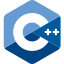
<br>

<div style="text-align:center; font-size:200%;">
 <b>SOLID: Interface-Segregations-Prinzip</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 14 SOLID Interface-Segregations-Prinzip.ipynb -->
<!-- slides/module_500_solid_grasp/topic_360_solid_isp.cpp -->


## SOLID : Interface-Segregations-Prinzip

- Kein Client einer Klasse `C` sollte von Methoden abhängen, die er nicht
  benutzt.
- Wenn das nicht der Fall ist
- Unterteile die Schnittstelle von `C` in mehrere unabhängige Schnittstellen.
- Ersetze `C` in jedem Client durch die vom Client tatsächlich verwendeten
  Schnittstellen.

In [ ]:
#include <iostream>

In [ ]:
class Car {
public:
    void Drive() { std::cout << "Accelerating." << std::endl; }
    void Repair() { std::cout << "Repairing." << std::endl; }
};

In [ ]:
class Driver {
public:
    void Drive(Car& car) { car.Drive(); }
};

In [ ]:
class Mechanic {
public:
    void WorkOn(Car& car) { car.Repair(); }
};

In [ ]:
Driver d;
Mechanic m;
Car c;

In [ ]:
d.Drive(c);

In [ ]:
m.WorkOn(c);

In [ ]:
class Drivable {
public:
    virtual ~Drivable() = default;
    virtual void Drive() = 0;
};

In [ ]:
class Repairable {
public:
    virtual ~Repairable() = default;
    virtual void Repair() = 0;
};

In [ ]:
class Car2
    : public Drivable
    , public Repairable {
public:
    void Drive() override { std::cout << "Accelerating." << std::endl; }
    void Repair() override { std::cout << "Repairing." << std::endl; }
};

In [ ]:
class Driver2 {
public:
    void Drive(Drivable& car) { car.Drive(); }
};

In [ ]:
class Mechanic2 {
public:
    void WorkOn(Repairable& car) { car.Repair(); }
};

In [ ]:
Driver2 d2;
Mechanic2 m2;
Car2 c2;

In [ ]:
d2.Drive(c2);

In [ ]:
m2.WorkOn(c2);


## Workshop:

In diesem Workshop werden wir an einem Restaurant-Management-System arbeiten.

Stellen Sie sich vor, Sie haben den Code eines Restaurant-Management-Systems
erhalten. Das System hat derzeit eine einzige Schnittstelle
`RestaurantOperations`, die alle Operationen definiert, die in einem
Restaurant durchgeführt werden können. Verschiedene Rollen im Restaurant, wie
der Kunde, der Koch, der Kassierer und der Hausmeister, verwenden alle
dieselbe Schnittstelle, aber jede Rolle verwendet nur einen Teil ihrer
Funktionen.

Ihre Aufgabe ist es, dieses System so umzubauen, dass es dem
Interface-Segregations-Prinzip entspricht. Das bedeutet, dass kein Client
gezwungen werden sollte, von Schnittstellen abhängig zu sein, die er nicht
verwendet.


1. Identifizieren Sie, welche Operationen für welche Rollen relevant sind.
2. Teilen Sie das `RestaurantOperations`-Interface in kleinere,
   rollenspezifische Schnittstellen auf.
3. Passen Sie die `Restaurant`-Klasse und die rollenbasierten Client-Klassen
   (`Customer`, `Chef`, `Cashier`, `Janitor`) an die neuen Schnittstellen an.
4. Stellen Sie sicher, dass jede Client-Klasse nur über die für ihre Rolle
   relevanten Operationen Bescheid weiß.

In [ ]:
#include <iostream>

In [ ]:
class RestaurantOperations {
public:
    virtual void PlaceOrder() = 0;
    virtual void CookOrder() = 0;
    virtual void CalculateBill() = 0;
    virtual void CleanTables() = 0;
};

In [ ]:
class Restaurant : public RestaurantOperations {
public:
    void PlaceOrder() override {
        std::cout << "Order has been placed.\n";
    }

    void CookOrder() override {
        std::cout << "Order is being cooked.\n";
    }

    void CalculateBill() override {
        std::cout << "Bill is being calculated.\n";
    }

    void CleanTables() override {
        std::cout << "Tables are being cleaned.\n";
    }
};

In [ ]:
class Customer {
    RestaurantOperations* restaurant;
public:
    Customer(RestaurantOperations* r) : restaurant(r) {}

    void MakeOrder() {
        restaurant->PlaceOrder();
        restaurant->CalculateBill();
    }
};

In [ ]:
class Chef {
    RestaurantOperations* restaurant;
public:
    Chef(RestaurantOperations* r) : restaurant(r) {}

    void PrepareFood() {
        restaurant->CookOrder();
    }
};

In [ ]:
class Cashier {
    RestaurantOperations* restaurant;
public:
    Cashier(RestaurantOperations* r) : restaurant(r) {}

    void GenerateBill() {
        restaurant->CalculateBill();
    }
};

In [ ]:
class Janitor {
    RestaurantOperations* restaurant;
public:
    Janitor(RestaurantOperations* r) : restaurant(r) {}

    void Clean() {
        restaurant->CleanTables();
    }
};

In [ ]:
Restaurant restaurant;
Customer customer(&restaurant);
Chef chef(&restaurant);
Cashier cashier(&restaurant);
Janitor janitor(&restaurant);

In [ ]:
customer.MakeOrder();
chef.PrepareFood();
cashier.GenerateBill();
janitor.Clean();

In [ ]:
#include <iostream>

In [ ]:
#include <iostream>

In [ ]:
class Ordering {
public:
    virtual void PlaceOrder() = 0;
};

In [ ]:
class Cooking {
public:
    virtual void CookOrder() = 0;
};

In [ ]:
class Billing {
public:
    virtual void CalculateBill() = 0;
};

In [ ]:
class Cleaning {
public:
    virtual void CleanTables() = 0;
};

In [ ]:
class Restaurant : public Ordering, public Cooking, public Billing, public Cleaning {
public:
    void PlaceOrder() override {
        std::cout << "Order has been placed.\n";
    }

    void CookOrder() override {
        std::cout << "Order is being cooked.\n";
    }

    void CalculateBill() override {
        std::cout << "Bill is being calculated.\n";
    }

    void CleanTables() override {
        std::cout << "Tables are being cleaned.\n";
    }
};

In [ ]:
class Customer {
    Ordering* ordering;
    Billing* billing;
public:
    Customer(Ordering* o, Billing* b) : ordering(o), billing(b) {}

    void MakeOrder() {
        ordering->PlaceOrder();
        billing->CalculateBill();
    }
};

In [ ]:
class Chef {
    Cooking* cooking;
public:
    Chef(Cooking* c) : cooking(c) {}

    void PrepareFood() {
        cooking->CookOrder();
    }
};

In [ ]:
class Cashier {
    Billing* billing;
public:
    Cashier(Billing* b) : billing(b) {}

    void GenerateBill() {
        billing->CalculateBill();
    }
};

In [ ]:
class Janitor {
    Cleaning* cleaning;
public:
    Janitor(Cleaning* c) : cleaning(c) {}

    void Clean() {
        cleaning->CleanTables();
    }
};

In [ ]:
Restaurant restaurant;
Customer customer(&restaurant, &restaurant);
Chef chef(&restaurant);
Cashier cashier(&restaurant);
Janitor janitor(&restaurant);

In [ ]:
customer.MakeOrder();
chef.PrepareFood();
cashier.GenerateBill();
janitor.Clean();